This notebook runs through different statistical tests that exist

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Normal Distribution')

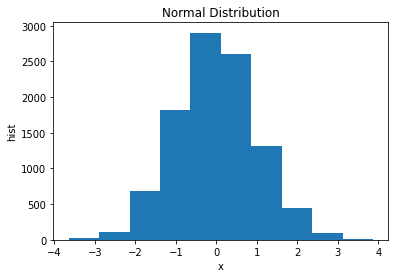

In [15]:
samples = np.random.normal(0, 1, 10000)
_ = plt.hist(samples)
plt.xlabel('x')
plt.ylabel('hist')
plt.title('Normal Distribution')

Flip a coin 20 times. It lands 14 times. Is the coin fair?

In [28]:
num_iter = 10000
num_heads = np.empty((num_iter), dtype=int)

for i in range(num_iter):
    samples = np.random.randint(0,2,20)
    num_heads[i] = np.sum(samples)

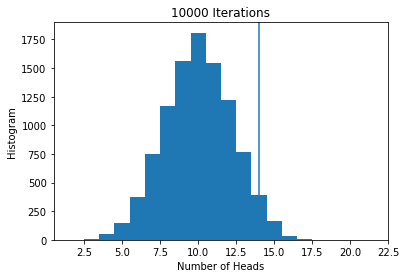

In [36]:
plt.hist(num_heads, 20, range=[1.5,21.5])
plt.xlabel('Number of Heads')
plt.ylabel('Histogram')
plt.title('10000 Iterations')
plt.axvline(14)

In [40]:
np.sum(num_heads>=14) / len(num_heads)

0.0599

## Standard error using binomial distribution

In [42]:
np.mean(np.random.randint(0,2,10000))

0.4977

In [43]:
np.std(np.random.randint(0,2,10000))

0.4999983099971439

In [74]:
num_iter = 100
num_samp_per_iter = 20

means_per_iter = np.empty(num_iter)
stds_per_iter = np.empty(num_iter)

for i in range(num_iter):
    temp = np.random.randint(0,2,num_samp_per_iter)
    means_per_iter[i] = np.mean(temp)
    stds_per_iter[i] = np.std(temp)

Text(0, 0.5, 'Mean Num Heads + SD')

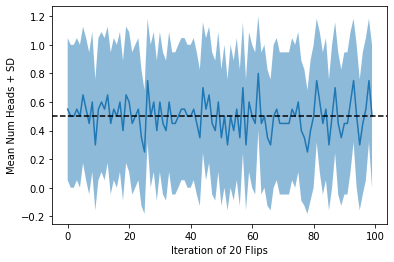

In [76]:
plt.plot(
    np.arange(num_iter),
    means_per_iter
)
plt.fill_between(
    np.arange(num_iter),
    means_per_iter - stds_per_iter,
    means_per_iter + stds_per_iter,
    alpha=0.5
)
plt.axhline(0.5, color='black', linestyle='dashed')
plt.xlabel('Iteration of 20 Flips')
plt.ylabel('Mean Num Heads + SD')

Text(0, 0.5, 'Mean Num Heads + SEM')

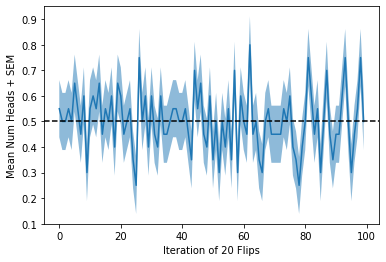

In [75]:
plt.plot(
    np.arange(num_iter),
    means_per_iter
)
plt.fill_between(
    np.arange(num_iter),
    means_per_iter - 0.5 / ((num_samp_per_iter)**0.5),
    means_per_iter + 0.5 / ((num_samp_per_iter)**0.5),
    alpha=0.5
)
plt.axhline(0.5, color='black', linestyle='dashed')
plt.xlabel('Iteration of 20 Flips')
plt.ylabel('Mean Num Heads + SEM')

In [71]:
np.mean(means_per_iter)

0.4985

In [72]:
np.std(means_per_iter)

0.11301659170228061

In [73]:
0.5 / ((num_samp_per_iter)**0.5)

0.11180339887498948

## Bootstrapping and Confidence Intervals

In [30]:
num_iter = 100
num_samp_per_iter = 100

means_per_iter = np.empty(num_iter)
sems_per_iter = np.empty(num_iter)
clows_per_iter = np.empty(num_iter)
chighs_per_iter = np.empty(num_iter)

for i in range(num_iter):
    temp = np.random.randint(0,2,num_samp_per_iter)
    means_per_iter[i] = np.mean(temp)
    sems_per_iter[i] = np.std(temp) / ((len(temp))**0.5)
    
    temp2 = scipy.stats.bootstrap((temp,), np.mean)
    clows_per_iter[i] = temp2.confidence_interval.low
    chighs_per_iter[i] = temp2.confidence_interval.high

Text(0, 0.5, 'Mean Num Heads + Calculated SEM')

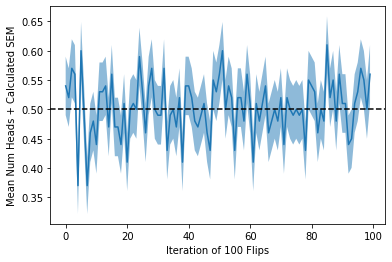

In [34]:
plt.plot(
    np.arange(num_iter),
    means_per_iter
)
plt.fill_between(
    np.arange(num_iter),
    means_per_iter - sems_per_iter,
    means_per_iter + sems_per_iter,
    alpha=0.5
)
plt.axhline(0.5, color='black', linestyle='dashed')
plt.xlabel('Iteration of 100 Flips')
plt.ylabel('Mean Num Heads + Calculated SEM')

Text(0, 0.5, 'Mean Num Heads + 95% Confidence Interval')

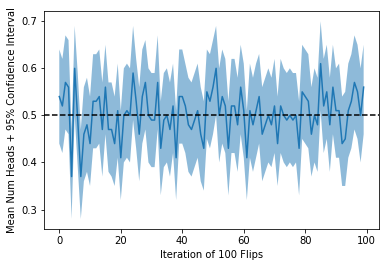

In [35]:
plt.plot(
    np.arange(num_iter),
    means_per_iter
)
plt.fill_between(
    np.arange(num_iter),
    clows_per_iter,
    chighs_per_iter,
    alpha=0.5
)
plt.axhline(0.5, color='black', linestyle='dashed')
plt.xlabel('Iteration of 100 Flips')
plt.ylabel('Mean Num Heads + 95% Confidence Interval')

## Plotting two Gaussian Distributions

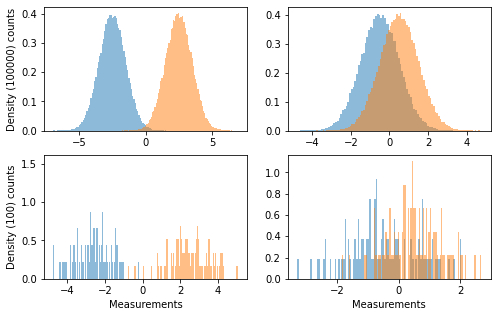

In [79]:
large_mean_separation = 5
small_mean_separation = 1
small_counts = 100
large_counts = 100000

fig, ax = plt.subplots(2, 2, figsize=(8,5))

samples = np.random.normal(-large_mean_separation/2, 1, large_counts)
_ = ax[0,0].hist(samples, bins=100, alpha=0.5, density=True)

samples = np.random.normal(large_mean_separation/2, 1, large_counts)
_ = ax[0,0].hist(samples, bins=100, alpha=0.5, density=True)

samples = np.random.normal(-small_mean_separation/2, 1, large_counts)
_ = ax[0,1].hist(samples, bins=100, alpha=0.5, density=True)

samples = np.random.normal(small_mean_separation/2, 1, large_counts)
_ = ax[0,1].hist(samples, bins=100, alpha=0.5, density=True)

samples = np.random.normal(-large_mean_separation/2, 1, small_counts)
_ = ax[1,0].hist(samples, bins=100, alpha=0.5, density=True)

samples = np.random.normal(large_mean_separation/2, 1, small_counts)
_ = ax[1,0].hist(samples, bins=100, alpha=0.5, density=True)

samples = np.random.normal(-small_mean_separation/2, 1, small_counts)
_ = ax[1,1].hist(samples, bins=100, alpha=0.5, density=True)

samples = np.random.normal(small_mean_separation/2, 1, small_counts)
_ = ax[1,1].hist(samples, bins=100, alpha=0.5, density=True)

ax[1,0].set_ylabel('Density ('+str(small_counts)+') counts')
ax[0,0].set_ylabel('Density ('+str(large_counts)+') counts')
for i in range(2):
    ax[-1,i].set_xlabel('Measurements')

## T test Paired Samples

In [107]:
a = np.random.normal(60, 10, 100)
b = np.random.normal(65, 10, 100)

Text(0.5, 0, 'Test Scores')

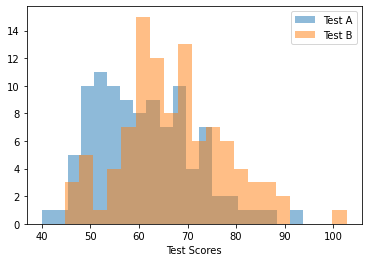

In [124]:
_ = plt.hist(a, alpha=0.5, bins=20, label='Test A')
_ = plt.hist(b, alpha=0.5, bins=20, label='Test B')
plt.legend()
plt.xlabel('Test Scores')

In [109]:
ttest = scipy.stats.ttest_rel(a,b,alternative='less')

In [110]:
ttest

TtestResult(statistic=-4.213602813686836, pvalue=2.7766110111825194e-05, df=99)

Text(0.5, 1.0, 'p value = 2.78e-05')

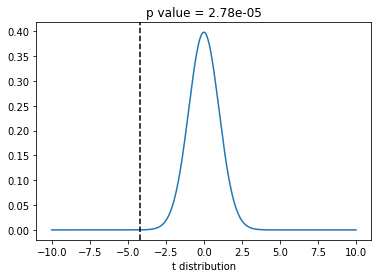

In [122]:
plt.plot(
    np.linspace(-10,10,1000),
    scipy.stats.t.pdf(np.linspace(-10,10,1000),99)
)
plt.axvline(ttest.statistic, color='black', linestyle='dashed')
plt.xlabel('t distribution')
plt.title('p value = '+str(np.round(ttest.pvalue,7)))

## T test (Independent or two sample)

Text(0.5, 0, 'Some Value')

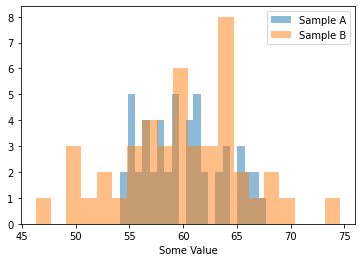

In [129]:
a = np.random.normal(60, 4, 50)
b = np.random.normal(61, 6, 45)

_ = plt.hist(a, alpha=0.5, bins=20, label='Sample A')
_ = plt.hist(b, alpha=0.5, bins=20, label='Sample B')
plt.legend()
plt.xlabel('Some Value')

In [133]:
ttest = scipy.stats.ttest_ind(a, b, equal_var=False, alternative='two-sided')

Text(0.5, 1.0, 'p value = 0.9201447')

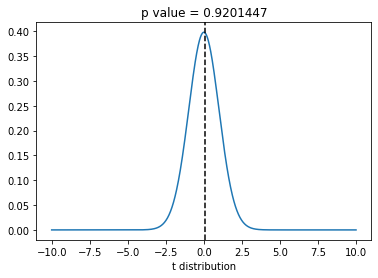

In [134]:
plt.plot(
    np.linspace(-10,10,1000),
    scipy.stats.t.pdf(np.linspace(-10,10,1000),50+45-2)
)
plt.axvline(ttest.statistic, color='black', linestyle='dashed')
plt.xlabel('t distribution')
plt.title('p value = '+str(np.round(ttest.pvalue,7)))

## T test (one-sample)

Text(0.5, 0, 'pH')

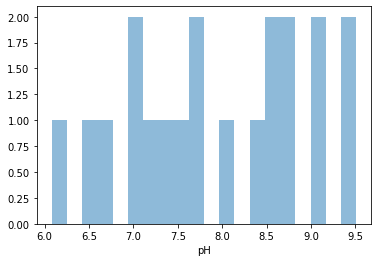

In [138]:
popmean = 7
a = np.random.normal(8, 1, 20)
_ = plt.hist(a, alpha=0.5, bins=20)
plt.xlabel('pH')

In [140]:
ttest = scipy.stats.ttest_1samp(a, popmean)

Text(0.5, 1.0, 'p value = 0.0005207')

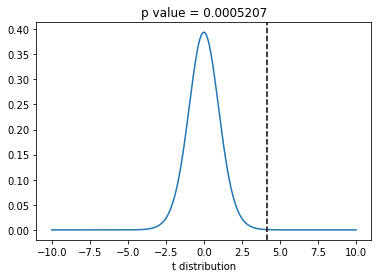

In [141]:
plt.plot(
    np.linspace(-10,10,1000),
    scipy.stats.t.pdf(np.linspace(-10,10,1000),19)
)
plt.axvline(ttest.statistic, color='black', linestyle='dashed')
plt.xlabel('t distribution')
plt.title('p value = '+str(np.round(ttest.pvalue,7)))

## One Way ANOVA

Text(0.5, 0, 'Test Score')

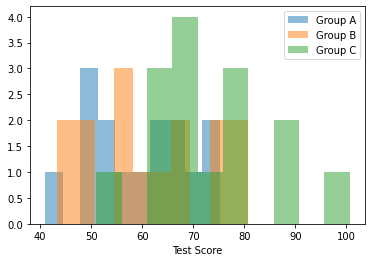

In [165]:
a = np.random.normal(60, 10, 15)
b = np.random.normal(62, 10, 15)
c = np.random.normal(70, 10, 15)

_ = plt.hist(a, alpha=0.5, bins=10, label='Group A')
_ = plt.hist(b, alpha=0.5, bins=10, label='Group B')
_ = plt.hist(c, alpha=0.5, bins=10, label='Group C')
plt.legend()
plt.xlabel('Test Score')

In [166]:
anova = scipy.stats.f_oneway(a,b,c)

Text(0.5, 1.0, 'p value = 0.0039198')

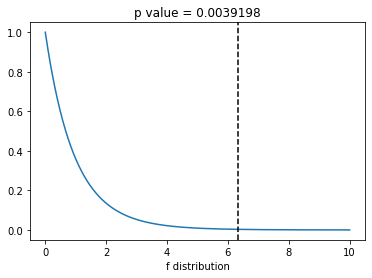

In [175]:
plt.plot(
    np.linspace(0,10,1000),
    scipy.stats.f.pdf(np.linspace(0,10,1000),3-1,15*3-1 - (3-1))
)
plt.axvline(anova.statistic, color='black', linestyle='dashed')
plt.xlabel('f distribution')
plt.title('p value = '+str(np.round(anova.pvalue,7)))

## Pearson r

Text(0.5, 1.0, 'r = 0.69, p = 5.527047484225613e-73')

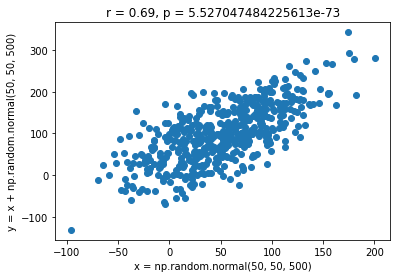

In [232]:
x = np.random.normal(50, 50, 500)
y = x + np.random.normal(50, 50, 500)

pearr = scipy.stats.pearsonr(x, y)

plt.scatter(x,y)
plt.xlabel('x = np.random.normal(50, 50, 500)')
plt.ylabel('y = x + np.random.normal(50, 50, 500)')
plt.title('r = '+str(round(pearr.statistic,2))+ ', p = '+str(pearr.pvalue))

Text(0.5, 1.0, 'r = 0.02, p = 0.6139494584219011')

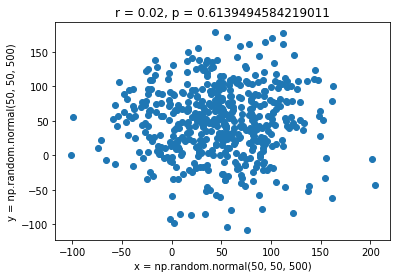

In [233]:
x = np.random.normal(50, 50, 500)
y = np.random.normal(50, 50, 500)

pearr = scipy.stats.pearsonr(x, y)

plt.scatter(x,y)
plt.xlabel('x = np.random.normal(50, 50, 500)')
plt.ylabel('y = np.random.normal(50, 50, 500)')
plt.title('r = '+str(round(pearr.statistic,2))+ ', p = '+str(pearr.pvalue))

## Spearman r

Text(0.5, 1.0, 'Pear. r = 0.92, Spear. r = 0.99')

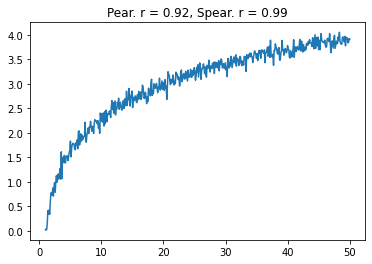

In [251]:
x = np.linspace(1,50,500)
y = np.log(x) + np.random.normal(0,0.1,500)

pearr = scipy.stats.pearsonr(x, y)
spear = scipy.stats.spearmanr(x, y)

plt.plot(x,y)
plt.title('Pear. r = '+str(round(pearr.statistic,2))+', Spear. r = '+str(round(spear.statistic,2)))

## Chi Squared Test

In [309]:
def get_cont_table(ar):
    assert len(ar)==2
    assert len(ar[0])==3
    table = np.empty((4,5), dtype='<U20')
    table[0,0] = '   '
    for i,val in enumerate([' A ',' B ',' C ','Tot']):
        table[0,i+1] = val
    for j,val in enumerate([' X ',' Y ','Tot']):
        table[j+1,0] = val
        
    table[1:3,1:4] = ar.copy()
    table[3,1:4] = np.sum(ar, axis=0)
    table[1:3,4] = np.sum(ar, axis=1)
    table[3,4] = np.sum(ar)
    
    return(table)

In [325]:
freqs = np.array([[207,282,241], [234,242,232]])
exp = np.sum(freqs, axis=0)[None,:] * np.sum(freqs, axis=1)[:,None] / np.sum(freqs)
chi_sq = np.sum((freqs - exp)**2 / exp)
df = np.prod(np.array(freqs.shape)-1)

In [311]:
print(get_cont_table(freqs))

[['   ' ' A ' ' B ' ' C ' 'Tot']
 [' X ' '207' '282' '241' '730']
 [' Y ' '234' '242' '232' '708']
 ['Tot' '441' '524' '473' '1438']]


In [318]:
chi_sq

4.542228269825232

In [327]:
df

2

In [328]:
scipy.stats.chi2?

Text(0.5, 1.0, 'p value = 0.103')

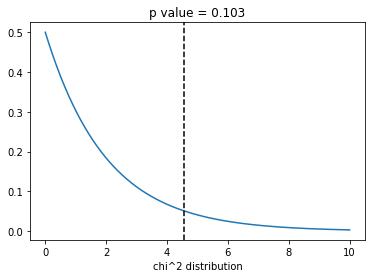

In [337]:
plt.plot(
    np.linspace(0,10,1000),
    scipy.stats.chi2.pdf(np.linspace(0,10,1000),df)
)
plt.axvline(chi_sq, color='black', linestyle='dashed')
plt.xlabel('chi^2 distribution')
plt.title('p value = '+str(round(1 - scipy.stats.chi2.cdf(chi_sq, df), 3)))

In [353]:
scipy.stats.chisquare(
    freqs.reshape((-1)), 
    exp.reshape((-1)),
    ddof=5-df
)

Power_divergenceResult(statistic=4.542228269825232, pvalue=0.1031971404730939)